# MNIST DIGIT RECOGNITION WITH LINEAR MODEL

In [440]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [445]:
# Load the MNIST data
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")
print("Number of images in:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))
#dir(data)

Number of images in:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [444]:
image_size_flat = data.img_size_flat

image_shape = data.img_shape

num_of_classes = data.num_classes
print(image_shape,num_of_classes)

(28, 28) 10


In [447]:
data.y_test[0:9,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [448]:
data.y_test_cls[0:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [450]:
def plot_images(images, true_label, pred_label=None):
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        pixels = images[i].reshape(image_shape)
        ax.imshow(pixels, cmap='gray')

        if pred_label is None:
            xlabel = "True_label: {0}".format(true_label[i])
        else:
            xlabel = "Label: {0}, Pred: {1}".format(true_label[i], pred_label[i])

        ax.set_xlabel(xlabel)
        #set no tick
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

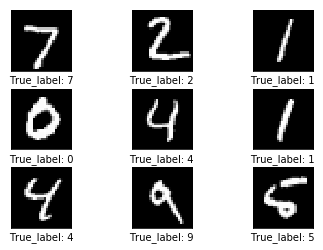

In [451]:
#image = np.array(data.x_test[i], dtype='float')
images = data.x_test[0:9]

true_label = data.y_test_cls[0:9]

plot_images(images=images, true_label=true_label)

In [502]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])
weight = tf.Variable(tf.zeros([img_size_flat, num_classes]))
bias = tf.Variable(tf.zeros([num_classes]))
logits = tf.matmul(x, weight) + bias
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

In [503]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

session = tf.Session()
session.run(tf.global_variables_initializer())
batch_size = 100

In [504]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)
feed_dict_test = {x: data.x_test,
                  y_true: data.y_test,
                  y_true_cls: data.y_test_cls}
def accuracy_rate():
   
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    print("Accuracy on test-set: {0:.1%}".format(acc))
def confusion_matrix_plot():
    
    cls_true = data.y_test_cls
    
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.tight_layout()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.colorbar()
    plt.show()
def error_example():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    incorrect = (correct == False)
    
    images = data.x_test[incorrect]
    
    cls_pred = cls_pred[incorrect]

    cls_true = data.y_test_cls[incorrect]
    
    plot_images(images=images[0:9],
                true_label=cls_true[0:9],
                pred_label=cls_pred[0:9])
def weight_plot():
    w = session.run(weight)
    w_min = np.min(w)
    w_max = np.max(w)

    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # plot only the weights of the first 10 sub-plots.
        if i<10:
            image = w[:, i].reshape(img_shape)

            ax.set_xlabel("Weights: {0}".format(i))

            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

Accuracy on test-set: 9.8%


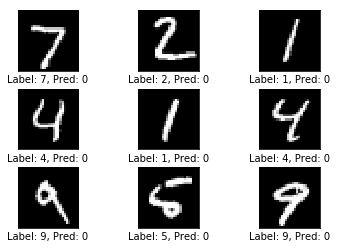

In [505]:
accuracy_rate()
error_example()

Accuracy on test-set: 36.3%


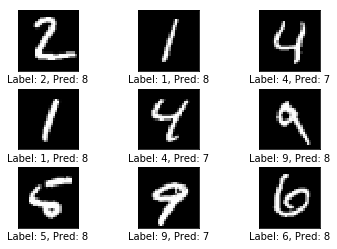

In [506]:
optimize(num_iterations=1)
accuracy_rate()
error_example()

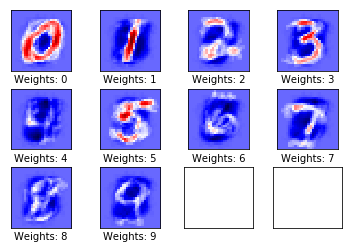

In [491]:
weight_plot()

Accuracy on test-set: 72.2%


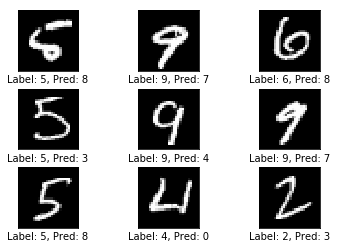

In [507]:
optimize(num_iterations=9)
accuracy_rate()
error_example()

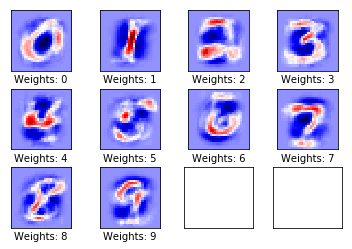

In [495]:
weight_plot()

Accuracy on test-set: 91.9%


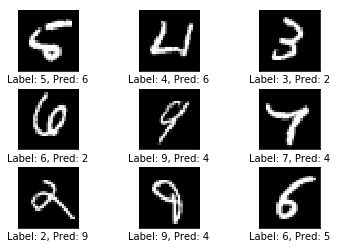

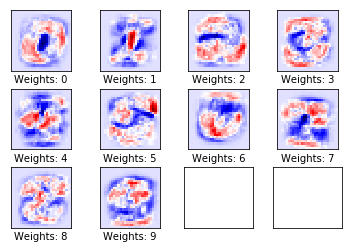

In [510]:
optimize(num_iterations=990)
accuracy_rate()
error_example()
weight_plot()

By plotting the confusion matrix, we are able to see more details about the mis-classifications. For example, 5 is likly to be mis-classified as 6 or 8.

[[ 959    0    2    1    0    3   11    2    2    0]
 [   0 1107    2    2    0    1    4    2   17    0]
 [  12    5  922   12   11    2   15   10   35    8]
 [   3    1   27  922    0   18    3    8   16   12]
 [   1    2    5    1  905    0   13    2   10   43]
 [  11    3    6   40    8  743   24    8   41    8]
 [   9    3    6    1    9    7  918    1    4    0]
 [   4   11   32    5    6    1    0  926    2   41]
 [   7    7    9   20    8   16   12    9  877    9]
 [  12    7    1    9   38    5    1   22    8  906]]


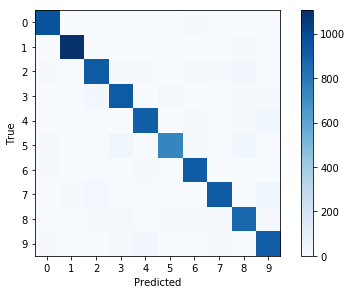

In [499]:
confusion_matrix_plot()

In [500]:
session.close()